In [1]:
import pandas as pd
import datetime as dt

## 서비스 이탈예측 데이터
데이터 출처 : https://www.kaggle.com/shubh0799/churn-modelling 에서 변형

데이터 설명 : 고객의 신상정보 데이터를 통한 회사 서비스 이탈 예측 (종속변수 : Exited)

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churn/train.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,6842,15793491,Cherkasova,714,Germany,Male,26,3,119545.48,2,1,0,65482.94,0
1,8963,15607874,Keane,687,France,Male,38,0,144450.58,1,0,1,137276.83,0
2,7047,15737627,Rivero,589,Germany,Female,20,2,121093.29,2,1,0,3529.72,0
3,7503,15697844,Whitehouse,721,Spain,Female,32,10,0.00,1,1,0,136119.96,1
4,3439,15722404,Carpenter,445,France,Female,30,3,0.00,2,1,1,127939.19,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        7999 non-null   int64  
 1   CustomerId       7999 non-null   int64  
 2   Surname          7999 non-null   object 
 3   CreditScore      7999 non-null   int64  
 4   Geography        7999 non-null   object 
 5   Gender           7999 non-null   object 
 6   Age              7999 non-null   int64  
 7   Tenure           7999 non-null   int64  
 8   Balance          7999 non-null   float64
 9   NumOfProducts    7999 non-null   int64  
 10  HasCrCard        7999 non-null   int64  
 11  IsActiveMember   7999 non-null   int64  
 12  EstimatedSalary  7999 non-null   float64
 13  Exited           7999 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 875.0+ KB


Q83.남성 이탈(Exited)이 가장 많은 국가(Geography)는 어디이고 이탈 인원은 몇명인가?

In [8]:
df.Gender.unique(), df.Exited.unique()

(array(['Male', 'Female'], dtype=object), array([0, 1], dtype=int64))

In [15]:
df [ (df.Gender == "Male" ) & (df.Exited == 1) ].Geography.value_counts().head(1)

Geography
Germany    287
Name: count, dtype: int64

In [29]:
df[df.Gender == 'Male'].groupby(['Geography']).sum()['Exited'].sort_values(ascending = False).head(1)

Geography
Germany    287
Name: Exited, dtype: int64

Q84.카드를 소유(HasCrCard ==1)하고 있으면서 활성멤버(IsActiveMember ==1) 인 고객들의 평균 나이를 소숫점이하 4자리까지 구하여라? 

In [17]:
round(df[ (df.HasCrCard == 1) & (df.IsActiveMember == 1) ].Age.mean(),4)

39.6102

Q85.Balance 값이 중간값 이상을 가지는 고객들의 CreditScore의 표준편차를 소숫점이하 3자리까지 구하여라

In [21]:
round(df[ df.Balance >= df.Balance.median() ].CreditScore.std(),3)

97.295

## 성인 건강검진데이터
데이터 출처 :https://www.data.go.kr/data/15007122/fileData.do (참고, 데이터 수정)

데이터 설명 : 2018년도 성인의 건강검 진데이터 (흡연상태 1- 흡연, 0-비흡연 )

In [22]:
url = 'https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/train.csv'
df = pd.read_csv(url)
df.head()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진수검여부,치아우식증유무,치석
0,F,55,145,55,73.0,0.7,0.5,1.0,1.0,129.0,...,12.9,1.0,0.9,172.0,209.0,15.0,0,Y,0.0,Y
1,M,40,180,55,74.0,1.5,1.5,1.0,1.0,102.0,...,15.6,1.0,0.8,30.0,19.0,23.0,1,Y,0.0,Y
2,F,55,150,50,72.0,1.0,0.2,1.0,1.0,116.0,...,14.1,1.0,1.0,31.0,19.0,10.0,0,Y,0.0,N
3,M,40,170,85,89.0,1.0,0.8,1.0,1.0,124.0,...,16.7,1.0,1.0,26.0,38.0,108.0,1,Y,1.0,Y
4,F,40,155,45,62.0,0.5,1.0,1.0,1.0,127.0,...,12.9,1.0,0.7,20.0,11.0,13.0,0,Y,0.0,N


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44553 entries, 0 to 44552
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         44553 non-null  object 
 1   연령대코드(5세단위)  44553 non-null  int64  
 2   신장(5Cm단위)    44553 non-null  int64  
 3   체중(5Kg단위)    44553 non-null  int64  
 4   허리둘레         44553 non-null  float64
 5   시력(좌)        44553 non-null  float64
 6   시력(우)        44553 non-null  float64
 7   청력(좌)        44553 non-null  float64
 8   청력(우)        44553 non-null  float64
 9   수축기혈압        44553 non-null  float64
 10  이완기혈압        44553 non-null  float64
 11  식전혈당(공복혈당)   44553 non-null  float64
 12  총콜레스테롤       44553 non-null  float64
 13  트리글리세라이드     44553 non-null  float64
 14  HDL콜레스테롤     44553 non-null  float64
 15  LDL콜레스테롤     44553 non-null  float64
 16  혈색소          44553 non-null  float64
 17  요단백          44553 non-null  float64
 18  혈청크레아티닌      44553 non-null  float64
 19  (혈청지

86.수축기혈압과 이완기 혈압기 수치의 차이를 새로운 컬럼(‘혈압차’) 으로 생성하고, 연령대 코드별 각 그룹 중 ‘혈압차’ 의 분산이 5번째로 큰 연령대 코드를 구하여라

In [24]:
df['혈압차'] = df.수축기혈압 - df.이완기혈압

In [37]:
df.groupby("연령대코드(5세단위)").혈압차.var().sort_values(ascending = False).index[4]

60

Q87.비만도를 나타내는 지표인 WHtR는 허리둘레 / 키로 표현한다. 일반적으로 0.58이상이면 비만으로 분류한다. 데이터중 WHtR 지표상 비만인 인원의 남/여 비율을 구하여라

In [47]:
df[df.허리둘레/df['신장(5Cm단위)']>= 0.58].groupby("성별코드").size()

성별코드
F    1470
M    1719
dtype: int64

In [49]:
df[df.허리둘레/df['신장(5Cm단위)']>= 0.58].groupby("성별코드").size()[1] / df[df.허리둘레/df['신장(5Cm단위)']>= 0.58].groupby("성별코드").size()[0]

1.1693877551020408

## 자동차 보험가입 예측데이터

In [51]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,188957,Female,25,1,17.0,1,< 1 Year,No,38785.0,152.0,59,0
1,275631,Male,20,1,22.0,0,< 1 Year,No,2630.0,160.0,113,0
2,329036,Female,40,1,41.0,0,1-2 Year,Yes,33165.0,124.0,188,0
3,227288,Female,28,1,30.0,1,< 1 Year,No,29038.0,152.0,233,0
4,300441,Female,50,1,28.0,0,1-2 Year,Yes,31325.0,124.0,258,0


Q88.Vehicle_Age 값이 2년 이상인 사람들만 필터링 하고 그중에서 Annual_Premium 값이 전체 데이터의 중간값 이상인 사람들을 찾고, 그들의 Vintage값의 평균을 구하여라

In [53]:
df.Vehicle_Age.unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [60]:
df[df.Vehicle_Age == '> 2 Years'][df[df.Vehicle_Age == '> 2 Years'].Annual_Premium >= df[df.Vehicle_Age == '> 2 Years'].Annual_Premium.median()].Vintage.mean()

154.55906743858552

Q89. vehicle_age에 따른 각 성별(gender)그룹의 Annual_Premium값의 평균을 구하여 아래 테이블과 동일하게 구현하라

In [70]:
df.groupby(['Vehicle_Age','Gender'])['Annual_Premium'].mean().unstack()

Gender,Female,Male
Vehicle_Age,,
1-2 Year,30762.245001,30413.088469
< 1 Year,29972.286702,30310.982212
> 2 Years,36108.366374,35303.870627


## 핸드폰 가격 예측데이터


In [71]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/mobile/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Q90.price_range 의 각 value를 그룹핑하여 각 그룹의 n_cores 의 빈도가 가장높은 value와 그 빈도수를 구하여라

In [87]:
df.groupby('price_range')['n_cores'].value_counts()

price_range  n_cores
0            2          69
             4          67
             8          67
             7          66
             3          62
             6          61
             5          59
             1          49
1            4          76
             1          76
             3          69
             8          60
             2          59
             7          55
             6          54
             5          51
2            4          73
             8          70
             7          69
             5          66
             6          57
             2          57
             3          56
             1          52
3            5          70
             7          69
             1          65
             2          62
             3          59
             8          59
             6          58
             4          58
Name: count, dtype: int64

In [90]:
df.groupby(['price_range','n_cores']).size().sort_values().groupby(level=0).tail(1)

price_range  n_cores
0            2          69
3            5          70
2            4          73
1            1          76
dtype: int64

In [105]:
df.groupby(['price_range','n_cores']).size().sort_values().groupby(level=0).head(1)

price_range  n_cores
0            1          49
1            5          51
2            1          52
3            6          58
dtype: int64

Q91.price_range 값이 3인 그룹에서 상관관계가 2번째로 높은 두 컬럼과 그 상관계수를 구하여라

In [102]:
df[df.price_range == 3].corr().unstack()[df[df.price_range == 3].corr().unstack() != 1].abs().sort_values(ascending = False).reset_index().iloc[1]

level_0          pc
level_1          fc
0          0.635166
Name: 1, dtype: object

## 비행탑승 경험 만족도 데이터

In [106]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/train.csv")
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,55882,Male,Loyal Customer,42,Business travel,Business,473,1,1,3,...,5,5,5,5,3,5,3,3,0.0,satisfied
1,31906,Female,Loyal Customer,31,Business travel,Business,3271,4,4,4,...,3,3,5,5,3,4,3,1,5.0,satisfied
2,85481,Male,Loyal Customer,51,Personal Travel,Eco,214,5,0,5,...,3,4,4,4,4,4,3,2,0.0,satisfied
3,102134,Male,Loyal Customer,44,Business travel,Business,3097,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
4,31580,Male,Loyal Customer,33,Business travel,Business,3286,1,1,1,...,4,2,5,2,5,1,4,0,0.0,satisfied


## Q92. Arrival Delay in Minutes 컬럼이 결측치인 데이터들 중 ‘neutral or dissatisfied’ 보다 ‘satisfied’의 수가 더 높은 Class는 어디 인가?

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

In [114]:
df[df['Arrival Delay in Minutes'].isna()].groupby(['Class','satisfaction']).size().unstack()[df[df['Arrival Delay in Minutes'].isna()].groupby(['Class','satisfaction']).size().unstack()['neutral or dissatisfied'] < df[df['Arrival Delay in Minutes'].isna()].groupby(['Class','satisfaction']).size().unstack()['satisfied']]

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,36,76


In [116]:
df.loc[df['Arrival Delay in Minutes'].isnull()].groupby(['Class','satisfaction'],as_index=False).size()

,Class,satisfaction,size
0,Business,neutral or dissatisfied,36
1,Business,satisfied,76
2,Eco,neutral or dissatisfied,100
3,Eco,satisfied,25
4,Eco Plus,neutral or dissatisfied,15
5,Eco Plus,satisfied,4


In [120]:
pv = df.loc[df['Arrival Delay in Minutes'].isnull()].groupby(['Class','satisfaction'],as_index=False).size().pivot(index='Class',columns='satisfaction')
pv

size          
satisfaction neutral or dissatisfied satisfied
Class                                         
Business                          36        76
Eco                              100        25
Eco Plus                          15         4

In [123]:
pv[pv['size']['neutral or dissatisfied'] < pv['size']['satisfied']]

size          
satisfaction neutral or dissatisfied satisfied
Class                                         
Business                          36        76

## 수질 음용성 여부 데이터

In [140]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/waters/train.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.918150,214.186611,23823.492888,7.290878,341.173322,411.424483,19.585002,25.057375,4.028958,0
1,5.422446,205.266080,18542.957451,5.491963,306.702227,382.080129,10.504023,67.493450,2.911751,1
2,7.341547,187.672402,21273.457066,7.784003,NaN,332.084293,16.842334,55.019151,4.025644,0
3,9.056245,197.666301,17403.532167,7.688917,337.460176,414.766631,15.349869,63.696746,3.319354,0
4,5.039374,142.860598,40829.353167,7.271543,NaN,386.803057,16.823773,52.297113,4.957420,0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2225 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          2003 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2488 non-null   float64
 8   Turbidity        2620 non-null   float64
 9   Potability       2620 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 204.8 KB


Q93.ph값은 상당히 많은 결측치를 포함한다. 결측치를 제외한 나머지 데이터들 중 사분위값 기준 하위 25%의 값들의 평균값은?

In [126]:
df.isna().sum()

ph                 395
Hardness             0
Solids               0
Chloramines          0
Sulfate            617
Conductivity         0
Organic_carbon       0
Trihalomethanes    132
Turbidity            0
Potability           0
dtype: int64

In [142]:
df_new = df.iloc[df.ph.dropna().index,:]

In [143]:
df_new.isna().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            526
Conductivity         0
Organic_carbon       0
Trihalomethanes    110
Turbidity            0
Potability           0
dtype: int64

In [150]:
df_new[df_new <= df_new.ph.quantile(0.25)].ph.mean()

5.057093462441732

## 의료 비용 예측 데이터

In [151]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/train.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,64,female,39.330,0,no,northeast,14901.51670
1,47,female,27.830,0,yes,southeast,23065.42070
2,52,female,33.300,2,no,southwest,10806.83900
3,33,female,22.135,1,no,northeast,5354.07465
4,30,male,31.400,1,no,southwest,3659.34600


## Q94.흡연자와 비흡연자 각각 charges의 상위 10% 그룹의 평균의 차이는?

In [167]:
df.shape

(1070, 7)

In [184]:
df[['smoker','charges']].sort_values(['smoker','charges']).groupby('smoker').head(int((df.smoker == 'no').sum()*0.1))

,smoker,charges
126,no,1121.87390
134,no,1131.50660
516,no,1135.94070
340,no,1136.39940
256,no,1137.01100
...,...,...
142,yes,27533.91290
610,yes,28101.33305
206,yes,28868.66390
56,yes,28950.46920


In [188]:
yes_thrs = df[df.smoker == 'yes'].charges.quantile(0.9)
no_thrs = df[df.smoker == 'no'].charges.quantile(0.9)

df[(df.smoker == 'yes') & (df.charges >= yes_thrs)].charges.mean() - df[(df.smoker == 'no') & (df.charges >= no_thrs)].charges.mean()

29297.954548156144

In [178]:
d = pd.DataFrame( {'a':['A','A','B','B','B','C'], 'b':[1,2,5,5,4,6]})
d.groupby('a')['b'].apply(list)

a
A       [1, 2]
B    [5, 5, 4]
C          [6]
Name: b, dtype: object

### Groupby()

https://teddylee777.github.io/pandas/pandas-groupby/

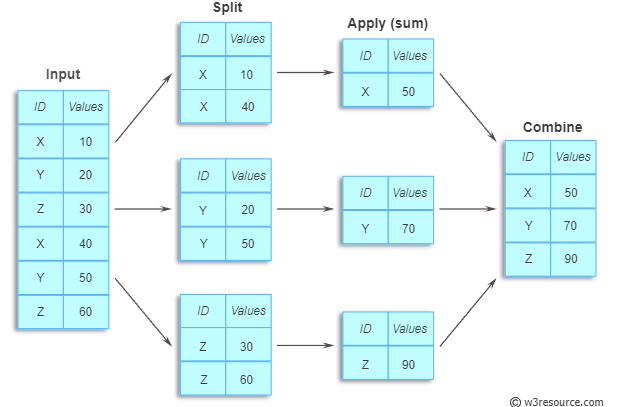

In [194]:
from IPython.display import Image
Image("groupby.PNG")

groupby().agg()
- count
- sum
- mean, median
- var, std
- min, max
- unique, nunique
- prod (곱)
- first, last

In [ ]:
# 다중 통계 적용
df.groupby('sex').agg(['mean', 'var'])

# 컬럼별 다른 통계량 산출
df.groupby('sex').agg({'total_bill': 'mean', 
                       'tip': ['sum', 'var'],
                       'size': 'median'
                      })

# 사용자정의 함수
df.groupby('sex')[['total_bill', 'tip']].agg(lambda x: x.mean() / x.std())

# as_index=False로 하여 기존 인덱스의 유지
df.groupby(['index'],as_index=False).sum()